In [1]:
pip install scikit-learn imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from imblearn.over_sampling import ADASYN


In [3]:
# Load data from CSV file
data = pd.read_csv('/content/df_cleaned_final.csv')

In [4]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,PC1,PC2
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,0,-1.35089,0.681003
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,0,-1.35089,0.681003
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,0,-1.35089,0.681003
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,0,-1.35089,0.681003
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,0,-1.35089,0.681003


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37089 entries, 0 to 37088
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          37089 non-null  int64  
 1   job          37089 non-null  object 
 2   marital      37089 non-null  object 
 3   education    37089 non-null  object 
 4   housing      37089 non-null  object 
 5   loan         37089 non-null  object 
 6   contact      37089 non-null  object 
 7   month        37089 non-null  object 
 8   day_of_week  37089 non-null  object 
 9   duration     37089 non-null  int64  
 10  campaign     37089 non-null  int64  
 11  previous     37089 non-null  int64  
 12  poutcome     37089 non-null  object 
 13  y            37089 non-null  int64  
 14  PC1          37089 non-null  float64
 15  PC2          37089 non-null  float64
dtypes: float64(2), int64(5), object(9)
memory usage: 4.5+ MB


In [6]:
print ("Number of unique values for each variable")
print("="*20)

for feature in data.columns.values:
    print(f"{feature} ({data[feature].dtypes}): {data[feature].nunique()}")
    print("-"*20)

Number of unique values for each variable
age (int64): 78
--------------------
job (object): 11
--------------------
marital (object): 3
--------------------
education (object): 7
--------------------
housing (object): 2
--------------------
loan (object): 2
--------------------
contact (object): 2
--------------------
month (object): 10
--------------------
day_of_week (object): 5
--------------------
duration (int64): 753
--------------------
campaign (int64): 7
--------------------
previous (int64): 8
--------------------
poutcome (object): 3
--------------------
y (int64): 2
--------------------
PC1 (float64): 373
--------------------
PC2 (float64): 373
--------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


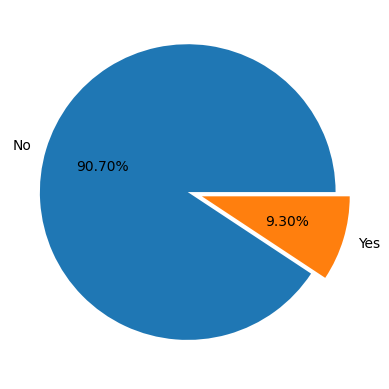

In [32]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.pie(data['y'].map({0:'No',1:'Yes'}).value_counts(),labels = data['y'].map({0:'No',1:'Yes'}).value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

<Axes: >

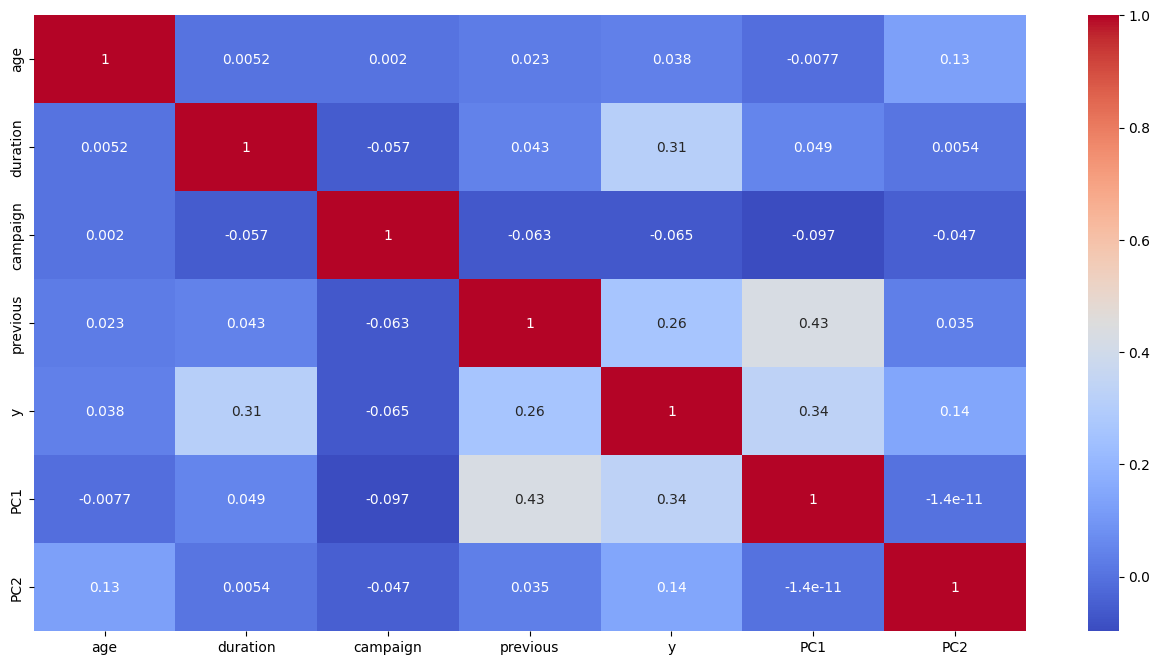

In [34]:
import seaborn as sns
import warnings
corr_matrix = data.select_dtypes(exclude="object").corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

In [7]:
# Separate features and labels
features = data.drop('y', axis=1)
labels = data['y']

In [9]:
# Define your features and labels explicitly
categorical_features = ['job',	'marital',	'education',	'housing',	'loan',	'contact',	'month',	'day_of_week', ]  # Specify your categorical feature column names
#numeric_features = ['age', 'duration', 'campaign', 'previous']
numeric_features = ['age', 'duration', 'campaign', 'previous', 'PC1', 'PC2']  #add "y" if the output is 100% # Specify your numeric feature column names
labels = data['y']  # Specify your label column name


In [10]:
# Perform one-hot encoding for categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = pd.DataFrame(encoder.fit_transform(data[categorical_features]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Convert feature names to string type
encoded_categorical_features.columns = encoded_categorical_features.columns.astype(str)


In [12]:
# Combine encoded categorical features and numeric features
features = pd.concat([encoded_categorical_features, data[numeric_features]], axis=1)


In [13]:
# Convert feature names to string type
features.columns = features.columns.astype(str)


In [14]:
# Create an instance of ADASYN
adasyn = ADASYN()

In [15]:
# Perform ADASYN oversampling
oversampled_features, oversampled_labels = adasyn.fit_resample(features, labels)


In [16]:
# Print the class distribution before and after ADASYN
print("Class distribution before ADASYN:")
print(labels.value_counts())
print("\nClass distribution after ADASYN:")
print(oversampled_labels.value_counts())

Class distribution before ADASYN:
0    33641
1     3448
Name: y, dtype: int64

Class distribution after ADASYN:
1    33973
0    33641
Name: y, dtype: int64


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Split the train set further into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Train set shape: (23736, 48)
Validation set shape: (5935, 48)
Test set shape: (7418, 48)


In [20]:
# Define the model to be used (e.g., Random Forest Classifier)
model = RandomForestClassifier()


In [21]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

In [22]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [23]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [24]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)


In [25]:
# Print the best parameters and model evaluation report
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(report)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      6728
           1       0.56      0.70      0.62       690

    accuracy                           0.92      7418
   macro avg       0.77      0.82      0.79      7418
weighted avg       0.93      0.92      0.93      7418



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [27]:
# Define the classifiers to be used
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier())
]

In [28]:
# Define the parameter grids for hyperparameter tuning
param_grids = [
    {'penalty': ['l2'], 'C': [0.1, 1, 10]},
    {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
    {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
    {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]},
    {'n_neighbors': [3, 5, 7]},
    {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
]


In [29]:
# Define the evaluation metrics
metrics = {
    'accuracy': accuracy_score,
    'precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted', zero_division=0),
    'recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted', zero_division=0),
    'f1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted', zero_division=0),
    'roc_auc': lambda y_true, y_pred: roc_auc_score(y_true, y_pred, average='weighted')
}


In [30]:
#ne code with 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode class labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Loop over classifiers, perform GridSearchCV, and evaluate on test set
for clf_name, clf in classifiers:
    param_grid = param_grids[classifiers.index((clf_name, clf))]
    grid_search = GridSearchCV(clf, param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train, y_train_encoded)

    best_model = grid_search.best_estimator_
    y_pred_encoded = best_model.predict(X_test)

    # Decode predicted labels back to original class labels
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    print("Classifier:", clf_name)
    print("Best Parameters:", grid_search.best_params_)

    for metric_name, metric_func in metrics.items():
        try:
            if metric_name == 'roc_auc':
                # Check for singleton classes in y_test and y_pred
                unique_classes_test = np.unique(y_test)
                unique_classes_pred = np.unique(y_pred)
                if len(unique_classes_test) == 1 or len(unique_classes_pred) == 1:
                    print(f"Error: Unable to calculate {metric_name} due to singleton class.")
                else:
                    # Convert class labels to binary values for ROC AUC calculation
                    y_test_binary = label_encoder.transform(y_test)
                    y_pred_binary = label_encoder.transform(y_pred)
                    score = metric_func(y_test_binary, y_pred_binary)
            else:
                score = metric_func(y_test, y_pred)
            print(f"{metric_name.capitalize()}: {score:.4f}")
        except ValueError:
            print(f"Error: Unable to calculate {metric_name} due to non-numeric values in y_test or y_pred")

    print("-----------")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: Logistic Regression
Best Parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.9152
Precision: 0.9003
Recall: 0.9152
F1: 0.9037
Roc_auc: 0.6470
-----------
Classifier: Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.9170
Precision: 0.9091
Recall: 0.9170
F1: 0.9121
Roc_auc: 0.7032
-----------
Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9257
Precision: 0.9162
Recall: 0.9257
F1: 0.9182
Roc_auc: 0.6989
-----------
Classifier: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.9265
Precision: 0.9196
Recall: 0.9265
F1: 0.9219
Roc_auc: 0.7280
-----------
Classifier: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 3}
Accuracy: 0.9059
Precision: 0.8894
Recall: 0.9059
F1: 0.8950
Roc_auc: 0.6308
-----------
Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5}
Accuracy: 0.9283
Precision: 0.9220
Recall: 0.9283
